In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import ml_utils as ml
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data_dir = "/Users/evanlewis/repos/machine_learning/datasets"
data = ml.get_data_from_dir(data_dir, "titanic_train.csv")

In [3]:
titanic_train, titanic_test = train_test_split(data, test_size=0.33, random_state=42)

In [4]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,NaN,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S


In [5]:
len(titanic_train), len(titanic_test)

(596, 295)

In [6]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            118
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          462
Embarked         1
dtype: int64

In [8]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
column_names_to_update = {"Pclass": "passenger class", "SibSp": "siblings spouses aboard", "Parch": "parents and children aboard"}
edited_column_names = ml.replace_column_names(column_names_to_update, titanic_train.columns)

In [10]:
new_column_names = ml.convert_column_names_to_lowercase(edited_column_names)
titanic_train.columns = new_column_names

In [11]:
titanic_train.head()

,passengerid,survived,passenger_class,name,sex,age,siblings_spouses_aboard,parents_and_children_aboard,ticket,fare,cabin,embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [12]:
titanic_train = pd.get_dummies(titanic_train, columns=["sex", "embarked"])

In [13]:
titanic_train.head(10)

,passengerid,survived,passenger_class,name,age,siblings_spouses_aboard,parents_and_children_aboard,ticket,fare,cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,1,0,0,1
718,719,0,3,"McEvoy, Mr. Michael",NaN,0,0,36568,15.5000,NaN,0,1,0,1,0
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",25.0,1,2,SC/Paris 2123,41.5792,NaN,0,1,1,0,0
73,74,0,3,"Chronopoulos, Mr. Apostolos",26.0,1,0,2680,14.4542,NaN,0,1,1,0,0
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",22.0,0,0,7552,10.5167,NaN,1,0,0,0,1
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",31.0,1,1,363291,20.5250,NaN,1,0,0,0,1
453,454,1,1,"Goldenberg, Mr. Samuel L",49.0,1,0,17453,89.1042,C92,0,1,1,0,0
145,146,0,2,"Nicholls, Mr. Joseph Charles",19.0,1,1,C.A. 33112,36.7500,NaN,0,1,0,0,1
234,235,0,2,"Leyson, Mr. Robert William Norman",24.0,0,0,C.A. 29566,10.5000,NaN,0,1,0,0,1
220,221,1,3,"Sunderland, Mr. Victor Francis",16.0,0,0,SOTON/OQ 392089,8.0500,NaN,0,1,0,0,1


In [14]:
titanic_train.survived.value_counts() 

0    374
1    222
Name: survived, dtype: int64

In [15]:
titanic_train.passenger_class.value_counts()

3    336
1    135
2    125
Name: passenger_class, dtype: int64

In [16]:
titanic_train.passenger_class.value_counts()

3    336
1    135
2    125
Name: passenger_class, dtype: int64

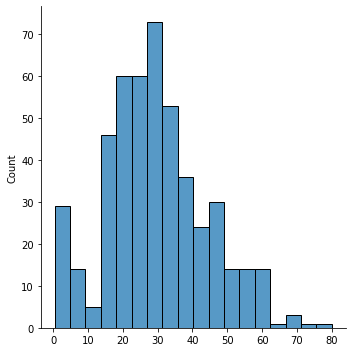

In [17]:
sns.displot(titanic_train.age.values)

In [18]:
titanic_train.age.fillna(0, inplace=True)

In [19]:
titanic_train.ticket.values

array(['17463', '36568', 'SC/Paris 2123', '2680', '7552', '363291',
       '17453', 'C.A. 33112', 'C.A. 29566', 'SOTON/OQ 392089', '11765',
       'A/4 48871', 'A/5. 3337', '113800', '233866', '113767', '11668',
       'SC/PARIS 2146', '349249', '364511', 'C.A. 31026', 'PP 9549',
       '223596', 'C.A. 33112', '349909', '113510', 'SOTON/O.Q. 392078',
       '13507', 'A/4. 39886', 'W./C. 14258', 'STON/O2. 3101290', '350417',
       '382649', 'W./C. 6608', '370377', '2672', '2695', '345763',
       '234686', '28403', '113059', '113572', '250644', '349239',
       '248731', 'C.A. 2673', 'A/5. 2151', '347077', '65306', '330979',
       '349234', 'PC 17603', '349224', '13567', '1601', '111361',
       'STON/O 2. 3101285', '4133', 'S.O./P.P. 3', 'CA 2144', '315093',
       '11751', 'S.W./PP 752', '382652', '1601', '4136', '237668',
       '364846', '3101276', '2627', '14313', 'W.E.P. 5734', 'C.A. 6212',
       '343275', '113776', '11767', 'S.C./PARIS 2079', '367228', '2908',
       '363291',

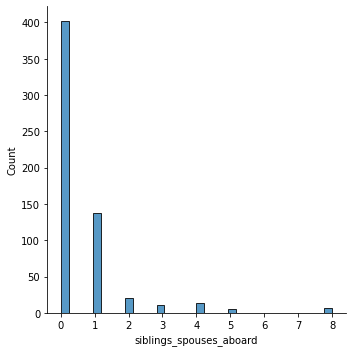

In [20]:
sns.displot(titanic_train.siblings_spouses_aboard)

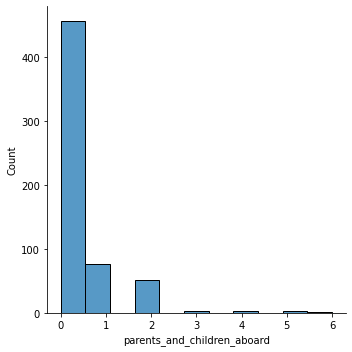

In [21]:
sns.displot(titanic_train.parents_and_children_aboard)

In [22]:
titanic_train.cabin.values

array(['E46', nan, nan, nan, nan, nan, 'C92', nan, nan, nan, 'E50', nan,
       nan, nan, nan, 'A32', nan, nan, nan, nan, nan, 'G6', nan, nan, nan,
       'C128', 'E10', 'E44', nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, 'B28', nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, 'B41', nan, 'B18', nan, nan, nan, nan, nan, 'D35',
       nan, nan, nan, nan, nan, nan, nan, nan, nan, 'E31', nan, nan, 'C2',
       'C50', nan, nan, nan, nan, nan, 'C103', nan, nan, nan, 'B18', nan,
       'B3', nan, nan, nan, nan, 'A10', nan, nan, 'C49', nan, 'C90', nan,
       nan, 'B77', nan, nan, nan, nan, 'C123', nan, nan, nan, 'D', nan,
       'D36', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'E33', nan,
       nan, nan, nan, nan, 'F2', nan, nan, nan, nan, nan, 'B5', nan, nan,
       'A19', nan, nan, 'B37', nan, 'F G73', nan, nan, nan, nan, nan, nan,
       nan, 'E58', 'C124', nan, 'C23 C25 C27', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, na

In [23]:
titanic_train.drop(columns=["name", "ticket", "cabin"], inplace=True)

In [27]:
titanic_train_labels = titanic_train.survived.copy()

In [29]:
titanic_train.drop(columns=["survived"], inplace=True)

In [30]:
titanic_train.head(10)

,passengerid,passenger_class,age,siblings_spouses_aboard,parents_and_children_aboard,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
6,7,1,54.0,0,0,51.8625,0,1,0,0,1
718,719,3,0.0,0,0,15.5000,0,1,0,1,0
685,686,2,25.0,1,2,41.5792,0,1,1,0,0
73,74,3,26.0,1,0,14.4542,0,1,1,0,0
882,883,3,22.0,0,0,10.5167,1,0,0,0,1
328,329,3,31.0,1,1,20.5250,1,0,0,0,1
453,454,1,49.0,1,0,89.1042,0,1,1,0,0
145,146,2,19.0,1,1,36.7500,0,1,0,0,1
234,235,2,24.0,0,0,10.5000,0,1,0,0,1
220,221,3,16.0,0,0,8.0500,0,1,0,0,1


In [31]:
titanic_train_labels.head()

6      0
718    0
685    0
73     0
882    0
Name: survived, dtype: int64

In [44]:
scaler = preprocessing.StandardScaler().fit(titanic_train)

In [45]:
titanic_train_scaled = scaler.transform(titanic_train)

In [48]:
logistic_regression = LogisticRegression(solver='liblinear', max_iter=500).fit(X=titanic_train_scaled, y=titanic_train_labels)

In [50]:
logistic_regression.score(titanic_train_scaled, titanic_train_labels)

0.8003355704697986